Starting Customer Segmentation Analysis...

Step 1: Generating Synthetic Dataset 'customer_data.csv'...

Step 2: Inspecting the Dataset...
DataFrame Shape: (200, 4)

Missing Values:
 Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

Duplicate Rows: 0

Data Types:
 Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

Summary Statistics:
        Customer ID        Age  Annual Income  Spending Score
count   200.000000  200.00000     200.000000      200.000000
mean    100.500000   43.42500   63008.715000       49.800000
std      57.879185   14.94191   36068.730041       24.456299
min       1.000000   18.00000   15077.000000       10.000000
25%      50.750000   31.00000   34304.750000       27.000000
50%     100.500000   43.50000   53915.000000       50.500000
75%     150.250000   56.00000   90073.500000       70.000000
max     200.000000   69.00000  148866.000000       93.000000

Step 3: S

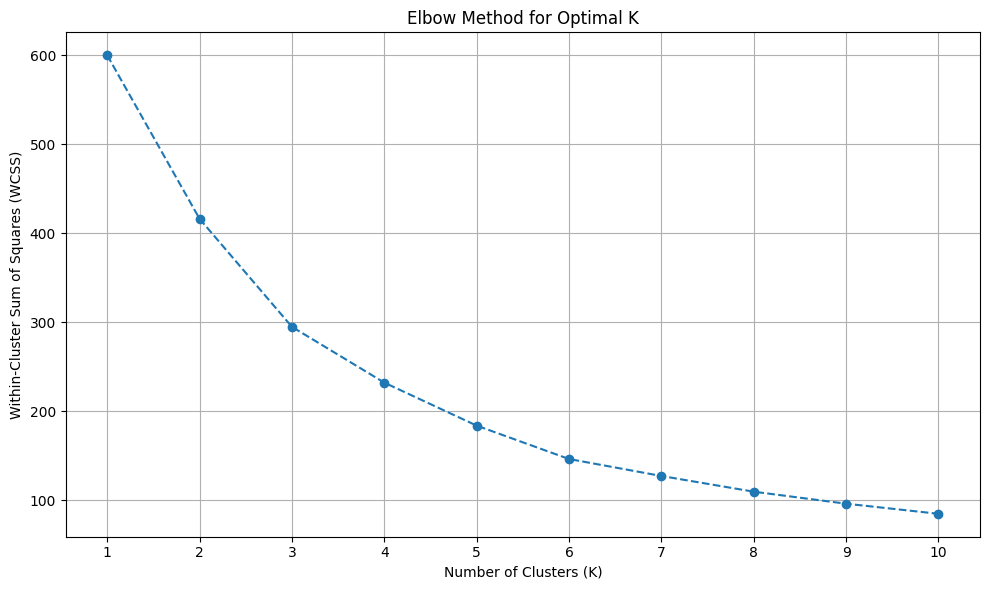

Elbow Method plot displayed. Look for the 'elbow point' to determine optimal K.
Assuming optimal number of clusters (K) is 5 based on visual inspection of the Elbow plot.

Step 5: Applying K-Means Clustering with K=5...
Cluster labels assigned to the dataset.
First 10 rows with Cluster labels:
    Customer ID  Age  Annual Income  Spending Score  Cluster
0            1   56          68178              46        2
1            2   69          60652              52        2
2            3   46          43709              65        2
3            4   32         137799              78        1
4            5   60         119298              82        1
5            6   25          15504              37        0
6            7   38          15823              10        3
7            8   56          31517              35        3
8            9   36          37700              38        0
9           10   40          60559              61        2

Summary Statistics for each Cluster:
      

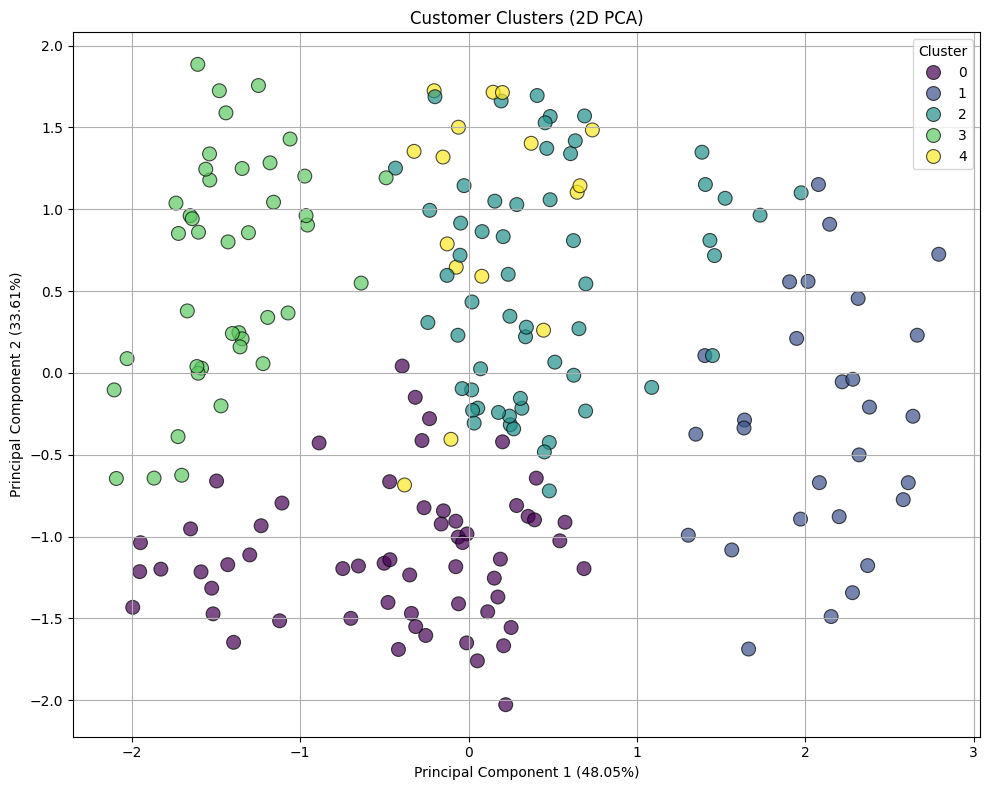

2D Scatter Plot (PCA) displayed.

Generating Pair Plots (may take a moment)...


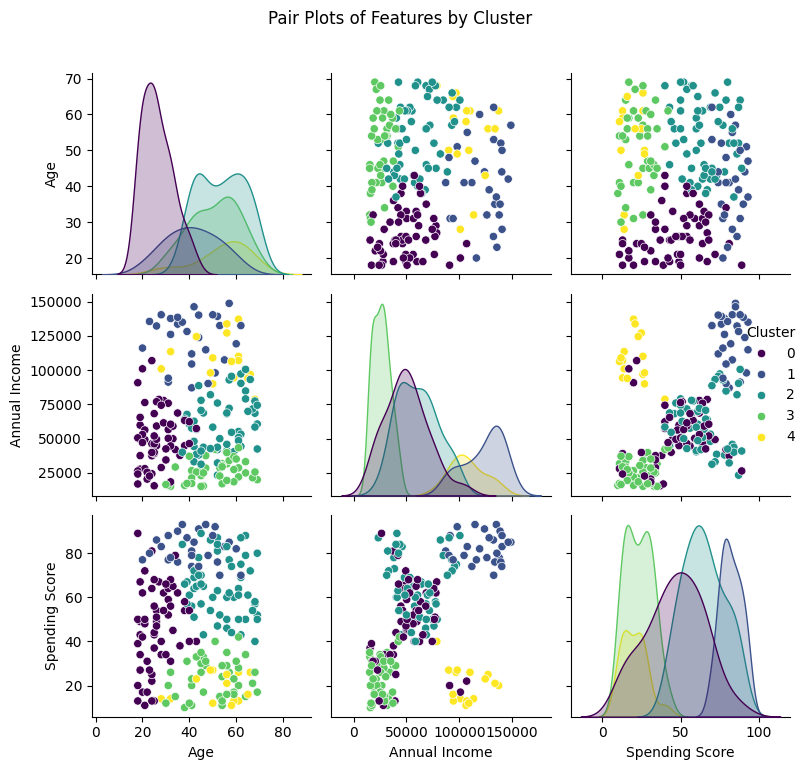

Pair Plots displayed.

Cluster Centroids (Original Scale):
          Age  Annual Income  Spending Score  Cluster
0  26.379310   50180.948276       46.500000        0
1  41.321429  123141.964286       81.964286        1
2  53.578947   60494.877193       64.614035        2
3  50.756098   26162.658537       23.341463        3
4  53.937500  107649.750000       20.500000        4


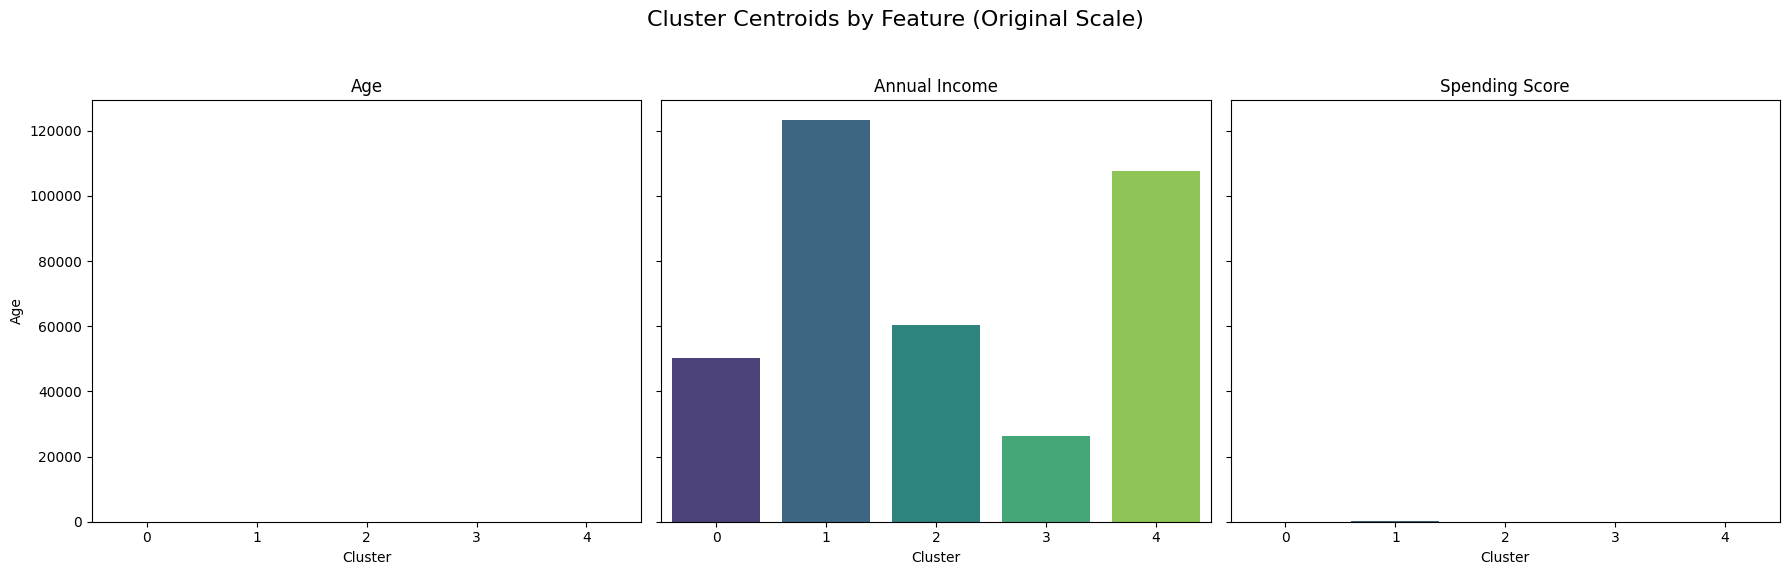

Centroid bar charts displayed.

Customer Segmentation Analysis Complete.
The 'df' DataFrame now contains a 'Cluster' column with assigned labels.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("Starting Customer Segmentation Analysis...")

print("\nStep 1: Generating Synthetic Dataset 'customer_data.csv'...")
np.random.seed(42) # for reproducibility

num_customers = 200
customer_ids = np.arange(1, num_customers + 1)
ages = np.random.randint(18, 70, num_customers)
annual_incomes = np.random.randint(15000, 150000, num_customers)
spending_scores = np.random.randint(1, 100, num_customers)



data = {
    'Customer ID': customer_ids,
    'Age': ages,
    'Annual Income': [],
    'Spending Score': []
}

for i in range(num_customers):
    segment = np.random.choice(['A', 'B', 'C', 'D', 'E'], p=[0.3, 0.3, 0.2, 0.1, 0.1])
    if segment == 'A': # Low Income, Low Spending
        data['Annual Income'].append(np.random.randint(15000, 40000))
        data['Spending Score'].append(np.random.randint(10, 40))
    elif segment == 'B': # Medium Income, Medium Spending
        data['Annual Income'].append(np.random.randint(40000, 80000))
        data['Spending Score'].append(np.random.randint(40, 70))
    elif segment == 'C': # High Income, High Spending
        data['Annual Income'].append(np.random.randint(80000, 150000))
        data['Spending Score'].append(np.random.randint(70, 95))
    elif segment == 'D': # Low Income, High Spending
        data['Annual Income'].append(np.random.randint(20000, 50000))
        data['Spending Score'].append(np.random.randint(70, 90))
    else: # High Income, Low Spending
        data['Annual Income'].append(np.random.randint(90000, 140000))
        data['Spending Score'].append(np.random.randint(10, 30))

df = pd.DataFrame(data)


# 1. Load the Dataset (already loaded into df)
print("\nStep 2: Inspecting the Dataset...")
print("DataFrame Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# Check for non-numeric types in features used for clustering
numeric_cols = ['Age', 'Annual Income', 'Spending Score']
for col in numeric_cols:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Warning: Column '{col}' is not numeric. Attempting conversion.")
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Handle NaNs if coercion happened (e.g., fill or drop)
        if df[col].isnull().any():
            print(f"NaNs introduced in '{col}' after conversion. Filling with mean.")
            df[col].fillna(df[col].mean(), inplace=True)


# 2. Data Preprocessing - Standardize the data
print("\nStep 3: Standardizing the Data...")
# Select features for clustering
features=df[['Age', 'Annual Income', 'Spending Score']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("Data standardized successfully.")
print("First 5 rows of scaled data:\n", scaled_df.head())

# 3. Clustering - Determine the optimal number of clusters (Elbow Method)
print("\nStep 4: Determining Optimal Number of Clusters using Elbow Method...")
wcss = []
# Test for 1 to 10 clusters
max_k = 11 # Test up to 10 clusters (range(1, 11) will go from 1 to 10)
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # n_init for multiple initializations
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_) # inertia is WCSS

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_k))
plt.grid(True)
plt.tight_layout()
plt.show()
print("Elbow Method plot displayed. Look for the 'elbow point' to determine optimal K.")

# For this synthetic dataset, let's assume optimal K is 5 based on common patterns.
# In a real scenario, you would visually inspect the plot.
optimal_k = 5
print(f"Assuming optimal number of clusters (K) is {optimal_k} based on visual inspection of the Elbow plot.")

# Apply K-Means Clustering
print(f"\nStep 5: Applying K-Means Clustering with K={optimal_k}...")
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(scaled_features)

# Add a new column to the original dataset with the assigned cluster labels
df['Cluster'] = cluster_labels
print("Cluster labels assigned to the dataset.")
print("First 10 rows with Cluster labels:\n", df.head(10))

# Display summary statistics per cluster
print("\nSummary Statistics for each Cluster:")
print(df.groupby('Cluster')[numeric_cols].mean())

# 4. Visualization
print("\nStep 6: Generating Visualizations...")

# 4.1 2D Scatter Plot using PCA
print("Performing PCA for 2D visualization...")
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df,
                palette='viridis', s=100, alpha=0.7, ec='black')
plt.title('Customer Clusters (2D PCA)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
print("2D Scatter Plot (PCA) displayed.")

# 4.2 Pair Plots (optional, can be time-consuming for many features)
print("\nGenerating Pair Plots (may take a moment)...")
# Select a subset of data or relevant features if the dataset is too large
# For pair plots, it's often more insightful to use the original (unscaled) features
# along with the cluster labels.
sns.pairplot(df, vars=['Age', 'Annual Income', 'Spending Score'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plots of Features by Cluster', y=1.02) # Adjust suptitle position
plt.tight_layout()
plt.show()
print("Pair Plots displayed.")

# 4.3 Centroid Visuals
# Get centroids in the original feature space for better interpretation
centroids_scaled = kmeans_final.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original_scale, columns=features.columns)
centroids_df['Cluster'] = range(optimal_k)

print("\nCluster Centroids (Original Scale):\n", centroids_df)

# Visualize centroids on a radar chart or bar chart (example: bar chart for key features)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Cluster Centroids by Feature (Original Scale)', fontsize=16)

for i, feature in enumerate(numeric_cols):
    sns.barplot(x='Cluster', y=feature, data=centroids_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{feature}')
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('Cluster')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()
print("Centroid bar charts displayed.")

print("\nCustomer Segmentation Analysis Complete.")
print("The 'df' DataFrame now contains a 'Cluster' column with assigned labels.")
